# Step 1: Installation and Setup

In [ ]:
# Installing TensorFlow
%pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 66.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is inc

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.20.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [ ]:
# importing the dataset
from tensorflow.keras.datasets import mnist

In [ ]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [ ]:
x_train.min(), x_train.max()

(np.uint8(0), np.uint8(255))

In [ ]:
y_train.min(), y_train.max()

(np.uint8(0), np.uint8(9))

In [ ]:
# normalize the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train.min(), x_train.max()

(np.float64(0.0), np.float64(1.0))

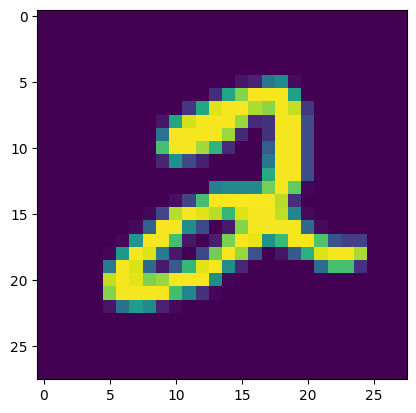

In [ ]:
plt.imshow(x_train[5])

In [ ]:
y_train[5]

np.uint8(2)

# Step 3: Building the LSTM

In [ ]:
# define an object (initilizing RNN)
model = tf.keras.models.Sequential()

In [ ]:

# add Input layer first
model.add(tf.keras.layers.Input(shape=(28, 28)))  # 28 timesteps, 28 features per timestep

# first LSTM block
model.add(tf.keras.layers.LSTM(units=128, activation='relu', return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))

# second LSTM block
model.add(tf.keras.layers.LSTM(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

# fully connected layer
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

# output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 28, 128)        │        80,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 28, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,426 (845.41 KB)

 Trainable params: 216,426 (845.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
# compile the model
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 4: Training the model

In [ ]:
history =  model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 161s 84ms/step - accuracy: 0.5997 - loss: 1.1860 - val_accuracy: 0.9501 - val_loss: 0.2030
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 223s 95ms/step - accuracy: 0.9502 - loss: 0.1823 - val_accuracy: 0.9648 - val_loss: 0.1296
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 162s 86ms/step - accuracy: 0.9696 - loss: 0.1129 - val_accuracy: 0.9807 - val_loss: 0.0692
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 161s 86ms/step - accuracy: 0.9770 - loss: 0.0846 - val_accuracy: 0.9832 - val_loss: 0.0548
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 160s 85ms/step - accuracy: 0.9802 - loss: 0.0735 - val_accuracy: 0.9831 - val_loss: 0.0573
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 159s 85ms/step - accuracy: 0.9826 - loss: 0.0646 - val_accuracy: 0.9834 - val_loss: 0.0582
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 163s 87ms/step - accuracy: 0.9863 - loss: 0.0511 - val_accuracy: 0.9851 - val_loss: 0.0562
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 159s 85ms/step - accuracy: 

In [ ]:
# predictions
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step


In [ ]:
print(y_pred[10]), print(y_test[10])

[9.9999994e-01 4.1327265e-23 1.1108197e-12 7.5330882e-17 2.7924737e-15
 1.2777063e-17 2.8354485e-11 5.1970178e-18 6.6222694e-11 1.5871330e-15]
0


(None, None)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 977    0    0    0    0    0    2    1    0    0]
 [   0 1132    1    0    0    0    2    0    0    0]
 [   1    0 1027    1    1    0    0    1    1    0]
 [   0    0    6  999    0    2    0    2    1    0]
 [   1    0    0    0  965    0    1    1    4   10]
 [   0    0    0   19    0  855    8    0    7    3]
 [   0    1    0    0    0    1  955    0    1    0]
 [   1    5    8    0    0    0    0 1008    0    6]
 [   1    0    1    1    0    1    0    1  968    1]
 [   0    1    0    0    8    1    0    1    4  994]]


In [ ]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.988


# Step 5: Learning Curve

In [ ]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

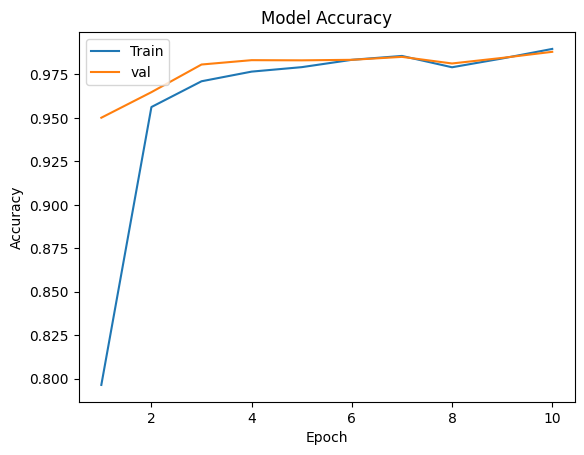

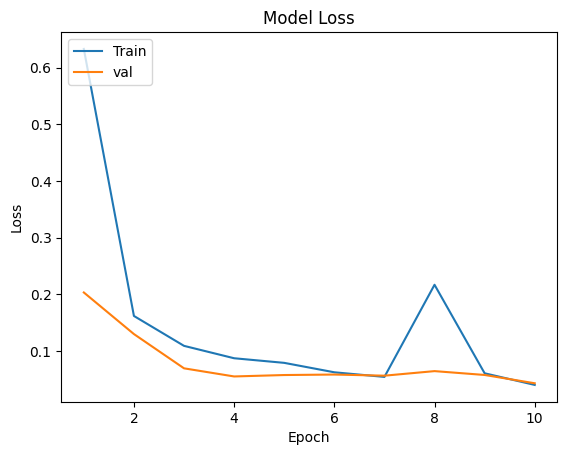

In [ ]:
learning_curve(history, 10)